## Binary Classification Machine Learning Case Study Project

How do you work through a `predictive modeling machine learning` problem end-to-end? We will work through a case study `classification predictive modeling` problem in Python including each `step of the applied machine learning process`. After completing this project, you will know:

* How to work through a classification predictive modeling problem end-to-end.
* How to use data transforms to improve model performance.
* How to use algorithm tuning to improve model performance.
* How to use ensemble methods and tuning of ensemble methods to improve model performance.



### Problem Definition

The `focus` of this project will be the **Sonar Mines** vs **Rocks dataset**. The problem is to **predict metal or rock objects from sonar return data**. Each pattern is a set of `60 numbers` in the range `0.0` to `1.0`. Each number represents the energy within a particular frequency band, integrated over a certain period of time. The label associated with each record contains the letter `R` if the object is a `rock` and `M` if it is a `mine (metal cylinder)`. The numbers in the labels are in
increasing order of aspect angle, but they do not encode the angle directly.

### Load the Dataset

Let's start off by loading the `libraries` required for this project.

In [1]:
# Load libraries
import numpy
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

The dataset can be downloaded from the `UCI Machine Learning repository` website and saved it in the local working directory 

In [2]:
# Load dataset
url = 'sonar.all-data.csv'
dataset = read_csv(url, header=None)

In [3]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


You can see that we are not `specifying the names of the attributes` this time. This is because other than the `class attribute` (`the last column`), the variables do not have `meaningful names`. We also indicate that there is no `header information`, this is to avoid `file loading code` taking the first record as the `column names`. Now that we have the dataset loaded we can take a look at it.

### Analyze Data

Let's take a closer look at our loaded data.

#### Descriptive Statistics

We will start off by confirming the `dimensions` of the `dataset`, e.g. the number of `rows` and `columns`.

In [4]:
# Descriptive statistics
# shape
print(dataset.shape)

(208, 61)


We have `208` instances to work with and can confirm the data has `61` attributes including the `class attribute`.

Let's also look at the data types of each attribute.

In [22]:
# types
set_option('display.max_rows', 500)
dataset.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
30    float64
31    float64
32    float64
33    float64
34    float64
35    float64
36    float64
37    float64
38    float64
39    float64
40    float64
41    float64
42    float64
43    float64
44    float64
45    float64
46    float64
47    float64
48    float64
49    float64
50    float64
51    float64
52    float64
53    float64
54    float64
55    float64
56    float64
57    float64
58    float64
59    float64
60     object
dtype: object

We can see that all of the `attributes` are `numeric` (`Float`) and that the `class value` has been read in as an `object`.

Let's now take a peek at the `first 20 rows` of the data.

In [12]:
# head
set_option('display.width', 100)
dataset.head(20)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.020,0.037,0.043,0.021,0.095,0.099,0.154,0.160,0.311,0.211,...,0.003,0.006,0.016,0.007,1.670e-02,0.018,8.400e-03,9.000e-03,0.003,R
1,0.045,0.052,0.084,0.069,0.118,0.258,0.216,0.348,0.334,0.287,...,0.008,0.009,0.005,0.009,1.910e-02,0.014,4.900e-03,5.200e-03,0.004,R
2,0.026,0.058,0.110,0.108,0.097,0.228,0.243,0.377,0.560,0.619,...,0.023,0.017,0.009,0.018,2.440e-02,0.032,1.640e-02,9.500e-03,0.008,R
3,0.010,0.017,0.062,0.021,0.021,0.037,0.110,0.128,0.060,0.126,...,0.012,0.004,0.015,0.009,7.300e-03,0.005,4.400e-03,4.000e-03,0.012,R
4,0.076,0.067,0.048,0.039,0.059,0.065,0.121,0.247,0.356,0.446,...,0.003,0.005,0.011,0.011,1.500e-03,0.007,4.800e-03,1.070e-02,0.009,R
5,0.029,0.045,0.028,0.017,0.038,0.099,0.120,0.183,0.210,0.304,...,0.004,0.001,0.004,0.001,8.900e-03,0.006,2.700e-03,5.100e-03,0.006,R
6,0.032,0.096,0.132,0.141,0.167,0.171,0.073,0.140,0.208,0.351,...,0.020,0.025,0.013,0.007,1.380e-02,0.009,1.430e-02,3.600e-03,0.010,R
7,0.052,0.055,0.084,0.032,0.116,0.092,0.103,0.061,0.146,0.284,...,0.008,0.012,0.004,0.012,9.700e-03,0.009,4.700e-03,4.800e-03,0.005,R
8,0.022,0.037,0.048,0.048,0.065,0.059,0.075,0.010,0.068,0.149,...,0.015,0.013,0.015,0.006,4.900e-03,0.006,9.300e-03,5.900e-03,0.002,R
9,0.016,0.017,0.035,0.007,0.019,0.067,0.106,0.070,0.096,0.025,...,0.009,0.022,0.018,0.008,6.800e-03,0.003,3.500e-03,5.600e-03,0.004,R


This does not show all of the columns, but we can see all of the `data` has the `same scale`. We can also see that the `class attribute` (60) has `string values`.

Let's summarize the distribution of each attribute.

In [23]:
# descriptions, change precision to 3 places
set_option('precision', 3)
dataset.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000,2.080e+02,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,...,208.000,2.080e+02,2.080e+02,208.000,2.080e+02,2.080e+02,2.080e+02,2.080e+02,2.080e+02,2.080e+02
mean,0.029,3.844e-02,0.044,0.054,0.075,0.105,0.122,0.135,0.178,0.208,...,0.016,1.342e-02,1.071e-02,0.011,9.290e-03,8.222e-03,7.820e-03,7.949e-03,7.941e-03,6.507e-03
std,0.023,3.296e-02,0.038,0.047,0.056,0.059,0.062,0.085,0.118,0.134,...,0.012,9.634e-03,7.060e-03,0.007,7.088e-03,5.736e-03,5.785e-03,6.470e-03,6.181e-03,5.031e-03
min,0.002,6.000e-04,0.002,0.006,0.007,0.010,0.003,0.005,0.007,0.011,...,0.000,8.000e-04,5.000e-04,0.001,6.000e-04,4.000e-04,3.000e-04,3.000e-04,1.000e-04,6.000e-04
25%,0.013,1.645e-02,0.019,0.024,0.038,0.067,0.081,0.080,0.097,0.111,...,0.008,7.275e-03,5.075e-03,0.005,4.150e-03,4.400e-03,3.700e-03,3.600e-03,3.675e-03,3.100e-03
50%,0.023,3.080e-02,0.034,0.044,0.062,0.092,0.107,0.112,0.152,0.182,...,0.014,1.140e-02,9.550e-03,0.009,7.500e-03,6.850e-03,5.950e-03,5.800e-03,6.400e-03,5.300e-03
75%,0.036,4.795e-02,0.058,0.065,0.100,0.134,0.154,0.170,0.233,0.269,...,0.021,1.673e-02,1.490e-02,0.015,1.210e-02,1.058e-02,1.043e-02,1.035e-02,1.033e-02,8.525e-03
max,0.137,2.339e-01,0.306,0.426,0.401,0.382,0.373,0.459,0.683,0.711,...,0.100,7.090e-02,3.900e-02,0.035,4.470e-02,3.940e-02,3.550e-02,4.400e-02,3.640e-02,4.390e-02


Again, as we expect, the data has the same `range`, but interestingly differing `mean values`. There may be some benefit from `standardizing` the data.

In [24]:
dataset.describe(include="all")

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
count,208.000,2.080e+02,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,...,2.080e+02,2.080e+02,208.000,2.080e+02,2.080e+02,2.080e+02,2.080e+02,2.080e+02,2.080e+02,208
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,111
mean,0.029,3.844e-02,0.044,0.054,0.075,0.105,0.122,0.135,0.178,0.208,...,1.342e-02,1.071e-02,0.011,9.290e-03,8.222e-03,7.820e-03,7.949e-03,7.941e-03,6.507e-03,NaN
std,0.023,3.296e-02,0.038,0.047,0.056,0.059,0.062,0.085,0.118,0.134,...,9.634e-03,7.060e-03,0.007,7.088e-03,5.736e-03,5.785e-03,6.470e-03,6.181e-03,5.031e-03,NaN
min,0.002,6.000e-04,0.002,0.006,0.007,0.010,0.003,0.005,0.007,0.011,...,8.000e-04,5.000e-04,0.001,6.000e-04,4.000e-04,3.000e-04,3.000e-04,1.000e-04,6.000e-04,NaN
25%,0.013,1.645e-02,0.019,0.024,0.038,0.067,0.081,0.080,0.097,0.111,...,7.275e-03,5.075e-03,0.005,4.150e-03,4.400e-03,3.700e-03,3.600e-03,3.675e-03,3.100e-03,NaN
50%,0.023,3.080e-02,0.034,0.044,0.062,0.092,0.107,0.112,0.152,0.182,...,1.140e-02,9.550e-03,0.009,7.500e-03,6.850e-03,5.950e-03,5.800e-03,6.400e-03,5.300e-03,NaN
75%,0.036,4.795e-02,0.058,0.065,0.100,0.134,0.154,0.170,0.233,0.269,...,1.673e-02,1.490e-02,0.015,1.210e-02,1.058e-02,1.043e-02,1.035e-02,1.033e-02,8.525e-03,NaN


In [25]:
# Checking Missing Values
dataset.isnull().sum() 

# No Missing Values found

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
50    0
51    0
52    0
53    0
54    0
55    0
56    0
57    0
58    0
59    0
60    0
dtype: int64

Let's take a quick look at the `breakdown` of `class values`.

In [27]:
# class distribution
dataset.groupby(60).size()

60
M    111
R     97
dtype: int64

We can see that the classes are reasonably `balanced` between `M` (`mines`) and `R` (`rocks`).

### Unimodal Data Visualizations

Let's look at `visualizations` of `individual attributes`. It is often useful to look at your `data` using `multiple different visualizations` in order to spark ideas. Let's look at `histograms` of each `attribute` to get a sense of the `data distributions`.

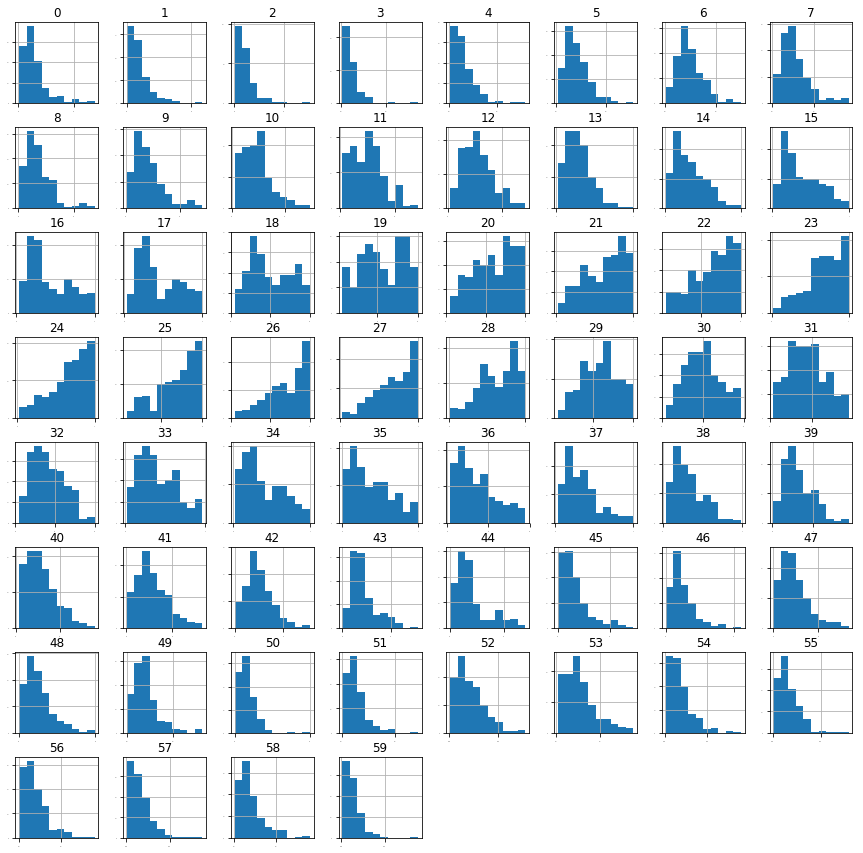

In [30]:
# Data visualizations

# histograms
dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(15,15))
pyplot.show()

We can see that there are a lot of `Gaussian-like distributions` and perhaps some `exponential-like distributions` for other attributes.

Let's take a look at the same perspective of the `data` using `density plots`.

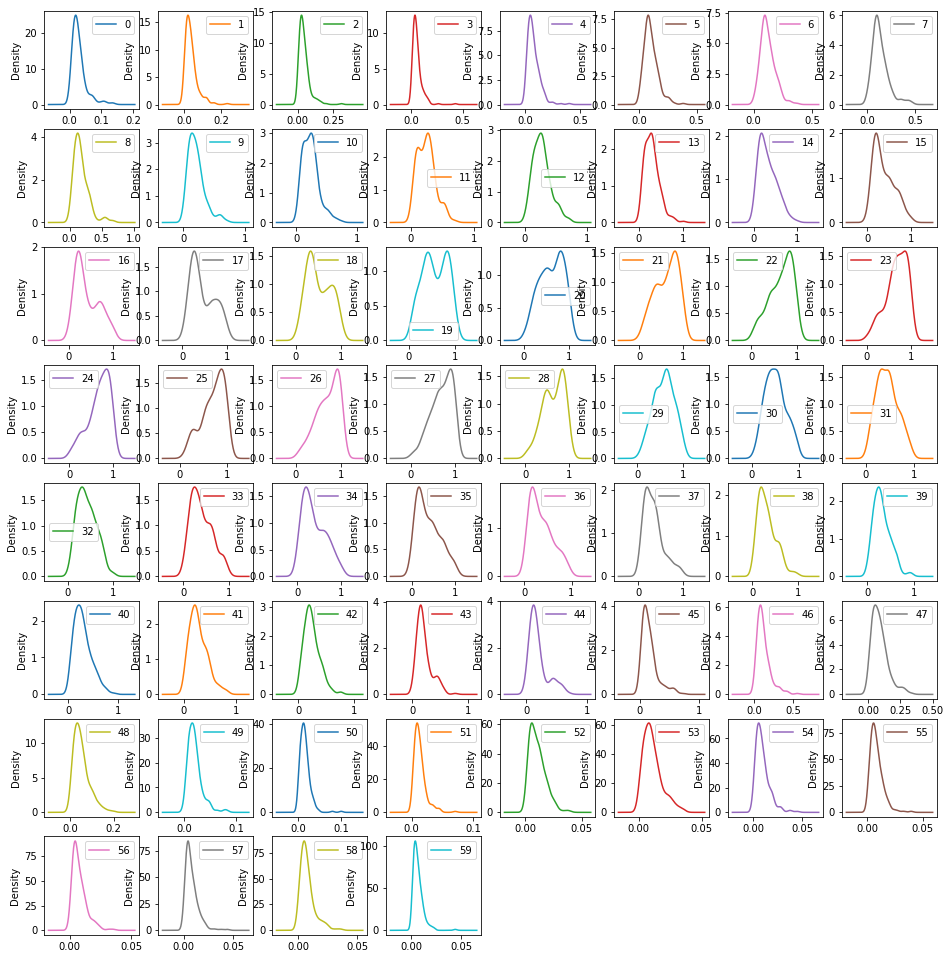

In [49]:
# density
dataset.plot(kind='density', subplots=True, layout=(8,8), sharex=False, figsize=(16,17), legend=True)
pyplot.show()

This is useful, you can see that many of the attributes have a `skewed distribution`. A power transform like a `Box-Cox transform` that can correct for the `skew in distributions` might be useful.

### Multimodal Data Visualizations

Let's visualize the correlations between the attributes.

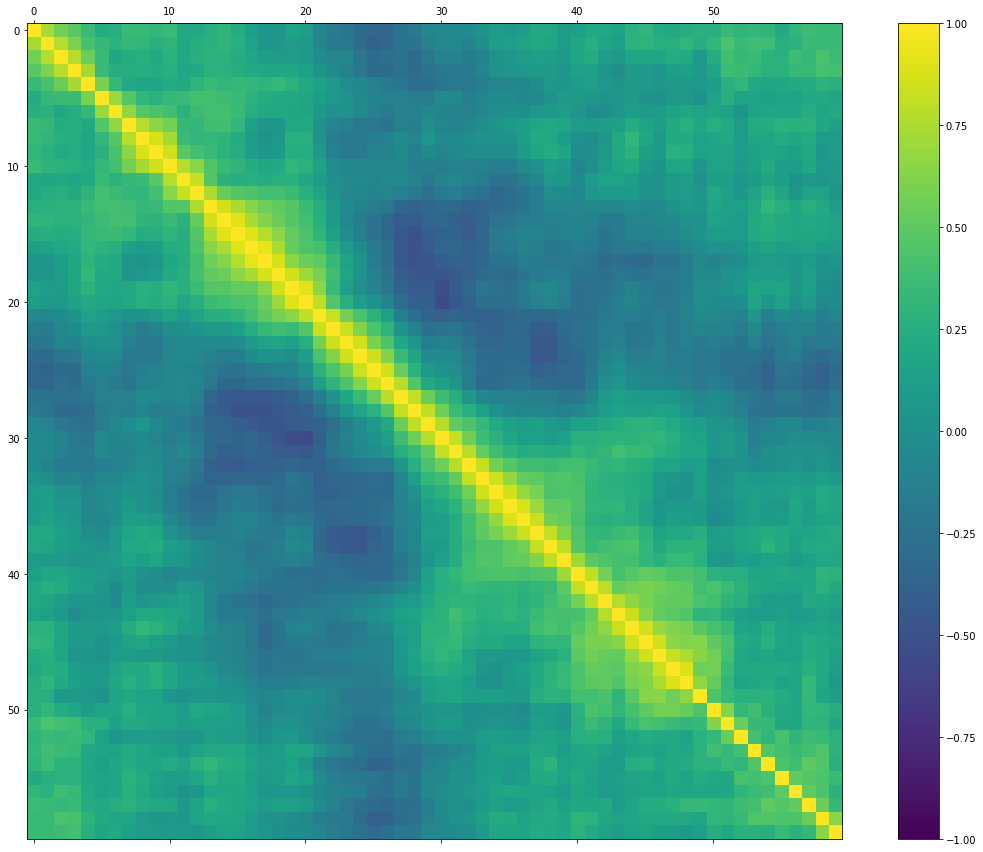

In [58]:
# correlation matrix
fig = pyplot.figure(figsize=(20,15))
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
pyplot.show()

It looks like there is also some `structure` in the order of the `attributes`. The `red` around the `diagonal` suggests that `attributes` that are next to each other are generally more `correlated` with each other. The `blue patches` also suggest some `moderate negative correlation` the further attributes are away from each other in the ordering. This makes sense if the order of the attributes refers to the `angle of sensors` for the `sonar chirp`.

### Validation Dataset

It is a good idea to use a `validation hold-out` set. This is a sample of the data that we hold back from our `analysis` and `modeling`. We use it right at the end of our project to confirm the `accuracy` of our final model. It is a `smoke test` that we can use to see if we `messed up` and to give us `confidence` on our `estimates of accuracy` on unseen data. We will use `80%` of the dataset for `modeling` and hold back `20%` for `validation`.

In [60]:
# Prepare Data

# Split-out validation dataset
array = dataset.values
X = array[:,0:60].astype(float)
Y = array[:,60]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed) 

### Evaluate Algorithms: Baseline

We don't know what `algorithms` will do well on this `dataset`. Gut feel suggests distance based algorithms like `k-Nearest Neighbors` and `Support Vector Machines` may do well. Let's design our test harness. We will use `10-fold cross-validation`. The `dataset` is not too small and this is a `good standard test harness` configuration. We will evaluate `algorithms` using the `accuracy metric`. This is a `gross metric` that will give a quick idea of how correct a given model is. More
useful on `binary classification problems` like this one.

In [61]:
# Evaluate Algorithms

# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'accuracy'

Let's create a `baseline of performance` on this problem and `spot-check` a number of different algorithms. We will select a suite of different algorithms capable of working on this `classification` problem. The six `algorithms` selected include:

**Linear Algorithms:** 
* Logistic Regression (LR) and 
* Linear Discriminant Analysis (LDA).

**Nonlinear Algorithms:** 
* Classification and Regression Trees (CART),
* Support Vector Machines (SVM), 
* Gaussian Naive Bayes (NB) and 
* k-Nearest Neighbors (KNN).

In [64]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [65]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

The `algorithms` all use `default tuning parameters`. Let's compare the algorithms. We will display the `mean` and `standard deviation` of `accuracy for each algorithm` as we calculate it and collect the `results` for use later.

In [67]:
results = []
names = []
for name, model in models:
	kfold = KFold(n_splits=num_folds, random_state=seed)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.782721 (0.093796)
LDA: 0.746324 (0.117854)
KNN: 0.808088 (0.067507)
CART: 0.687868 (0.109142)
NB: 0.648897 (0.141868)
SVM: 0.608824 (0.118656)


Running the example provides the output below. The results suggest That both `Logistic Regression` and `k-Nearest Neighbors` may be worth further study.

These are just `mean accuracy` values. It is always wise to look at the `distribution of accuracy values` calculated across `cross-validation folds`. We can do that `graphically` using `box and whisker plots`.

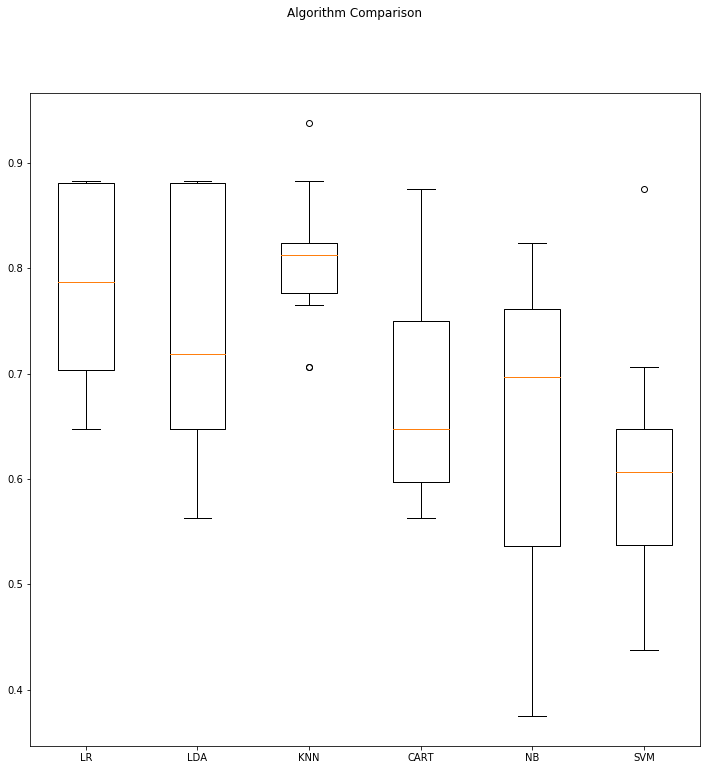

In [71]:
# Compare Algorithms
fig = pyplot.figure(figsize=(12,12))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

The `results` show a `tight distribution` for `KNN` which is encouraging, suggesting `low variance`. The poor results for `SVM` are surprising.

It is possible that the `varied distribution` of the `attributes` is having an effect on the `accuracy` of algorithms such as `SVM`. In the next section we will repeat this `spot-check` with a `standardized
copy` of the `training dataset`.

## Evaluate Algorithms: Standardize Data

We suspect that the `differing distributions` of the raw data may be `negatively impacting` the skill of some of the algorithms. Let's evaluate the same `algorithms` with a `standardized copy of the dataset`. This is where the `data` is `transformed such that each attribute has a mean value of zero` and a `standard deviation` of `one`. We also need to avoid `data leakage` when we transform the data. A good way to avoid leakage is to use `pipelines that standardize the data` and build the `model` for each `fold` in the `cross-validation test harness`. That way we can get a fair estimation of how each `model with standardized data` might perform on unseen data.

In [72]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))

Running the example provides the results listed below. We can see that **KNN** is still doing well, even better than before. We can also see that the `standardization` of the data has lifted the skill of `SVM` to be the most accurate **algorithm** tested so far.

In [73]:
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: 0.734191 (0.095885)
ScaledLDA: 0.746324 (0.117854)
ScaledKNN: 0.825735 (0.054511)
ScaledCART: 0.752941 (0.084540)
ScaledNB: 0.648897 (0.141868)
ScaledSVM: 0.836397 (0.088697)


Again, we should plot the `distribution` of the accuracy scores using `box` and `whisker plots`.

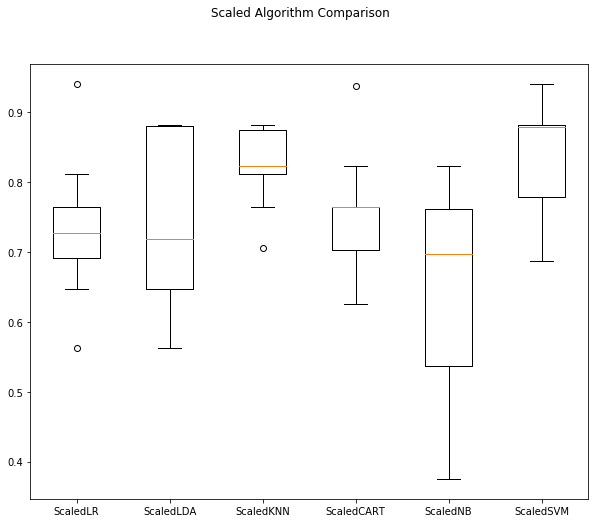

In [82]:
# Compare Algorithms
fig = pyplot.figure(figsize=(10,8))
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

The results suggest `digging deeper` into the `SVM` and `KNN` `algorithms`. It is very likely that configuration beyond the default may yield even more accurate models.

## Algorithm Tuning

We investigate tuning the `parameters` for two `algorithms` that show promise from the `spot-checking` in the previous section: **KNN** and **SVM**.

### Hyperparameter Tuning (KNN)

We can start off by tuning the number of `neighbors` for `KNN`. The default number of neighbors is `7`. Below we try all `odd values` of `k` from `1 to 21`, covering the `default value of 7`. Each `k` value is evaluated using `10-fold` `cross-validation` on the `training standardized dataset`.

In [84]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [85]:
# Tune scaled KNN
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
neighbors = [1,3,5,7,9,11,13,15,17,19,21]
param_grid = dict(n_neighbors=neighbors)
model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.849398 using {'n_neighbors': 1}
0.849398 (0.059881) with: {'n_neighbors': 1}
0.837349 (0.066303) with: {'n_neighbors': 3}
0.837349 (0.037500) with: {'n_neighbors': 5}
0.765060 (0.089510) with: {'n_neighbors': 7}
0.753012 (0.086979) with: {'n_neighbors': 9}
0.734940 (0.104890) with: {'n_neighbors': 11}
0.734940 (0.105836) with: {'n_neighbors': 13}
0.728916 (0.075873) with: {'n_neighbors': 15}
0.710843 (0.078716) with: {'n_neighbors': 17}
0.722892 (0.084555) with: {'n_neighbors': 19}
0.710843 (0.108829) with: {'n_neighbors': 21}


We can print out `configuration` that resulted in the `highest accuracy` as well as the `accuracy of all values tried`.

We can see that the `optimal configuration` is **K=1**. This is interesting as the algorithm will make predictions using the most similar instance in the training dataset alone.

### Hyperparameter Tuning SVM

We can `tune` two key parameters of the `SVM algorithm`, the value of `C` (how much to relax the margin) and the type of kernel. The default for `SVM` (`the SVC class`) is to use the `Radial Basis Function (RBF) kernel` with a `C` value set to `1.0`. Like with `KNN`, we will perform a `grid search` using `10-fold cross-validation` with a standardized copy of the training dataset. We will try a number of simpler kernel types and `C` values with `less bias and more bias` (less than and
more than `1.0` respectively).

In [86]:
# Tune scaled SVM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.867470 using {'C': 1.5, 'kernel': 'rbf'}
0.759036 (0.098863) with: {'C': 0.1, 'kernel': 'linear'}
0.530120 (0.118780) with: {'C': 0.1, 'kernel': 'poly'}
0.572289 (0.130339) with: {'C': 0.1, 'kernel': 'rbf'}
0.704819 (0.066360) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.746988 (0.108913) with: {'C': 0.3, 'kernel': 'linear'}
0.644578 (0.132290) with: {'C': 0.3, 'kernel': 'poly'}
0.765060 (0.092312) with: {'C': 0.3, 'kernel': 'rbf'}
0.734940 (0.054631) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.740964 (0.083035) with: {'C': 0.5, 'kernel': 'linear'}
0.680723 (0.098638) with: {'C': 0.5, 'kernel': 'poly'}
0.789157 (0.064316) with: {'C': 0.5, 'kernel': 'rbf'}
0.746988 (0.059265) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.746988 (0.084525) with: {'C': 0.7, 'kernel': 'linear'}
0.740964 (0.127960) with: {'C': 0.7, 'kernel': 'poly'}
0.813253 (0.084886) with: {'C': 0.7, 'kernel': 'rbf'}
0.753012 (0.058513) with: {'C': 0.7, 'kernel': 'sigmoid'}
0.759036 (0.096940) with: {'C': 0.9, 'kernel': 'linear'

Running the code prints out the `best configuration`, the `accuracy` as well as the `accuracies` for all configuration combinations.

We can see the most `accurate configuration` was `SVM` with an `RBF kernel` and a `C value` of 1.5. The accuracy **86.7470%** is seemingly `better` than what `KNN` could achieve.

### Ensemble Methods

Another way that we can improve the `performance of algorithms` on this problem is by using `ensemble methods`. In this section we will evaluate four different `ensemble machine learning` `algorithms`, two boosting and two bagging methods:

**Boosting Methods:**
* AdaBoost (AB) and 
* Gradient Boosting (GBM).


**Bagging Methods:**
* Random Forests (RF) and 
* Extra Trees (ET).

We will use the same test harness as before, `10-fold cross-validation`. No `data standardization` is used in this case because all `four ensemble algorithms` are based on `decision trees` that are less `sensitive to data distributions`.

In [87]:
# ensembles
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))

In [89]:
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# Running the example provides the following accuracy scores.

AB: 0.819853 (0.058293)
GBM: 0.854044 (0.096209)
RF: 0.793750 (0.089187)
ET: 0.818382 (0.056172)


We can see that both `boosting techniques` provide `strong accuracy scores` in the `low 80s(%)` with default configurations. We can plot the distribution of accuracy scores across the `cross-validation folds`.

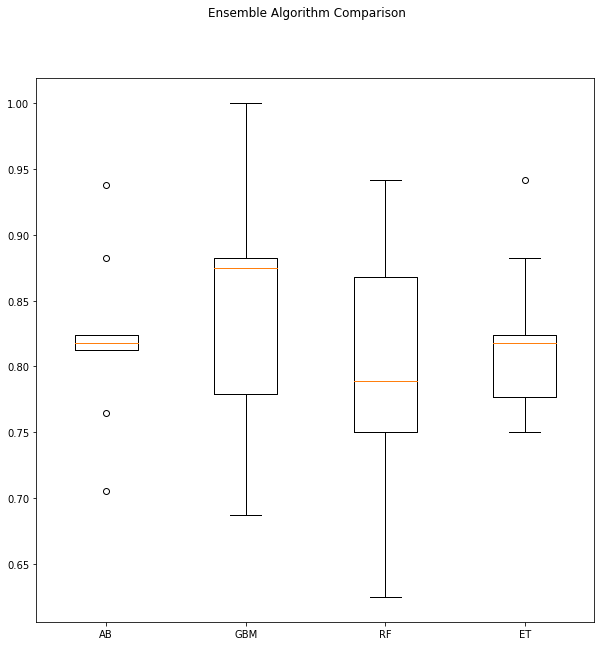

In [91]:
# Compare Algorithms
fig = pyplot.figure(figsize=(10, 10))
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

The results suggest `GBM` may be worthy of further study, with a strong `mean` and a `spread` that `skews` up towards high `90s(%)` in accuracy.

## Finalize Model

The **SVM** showed the most promise as a `low complexity` and `stable model` for this problem. In this last section we will finalize the model by `training it on the entire training dataset` and make predictions for the `hold-out validation dataset` to confirm our finndings. A part of the findings was that `SVM` performs better when the dataset is `standardized` so that all attributes have a `mean` value of zero and a `standard deviation` of one. We can calculate this from the entire training
dataset and apply the same transform to the input attributes from the validation dataset.

In [92]:
# Finalize Model

# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = SVC(C=1.5)
model.fit(rescaledX, Y_train)

SVC(C=1.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [93]:
# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8571428571428571
[[23  4]
 [ 2 13]]
              precision    recall  f1-score   support

           M       0.92      0.85      0.88        27
           R       0.76      0.87      0.81        15

   micro avg       0.86      0.86      0.86        42
   macro avg       0.84      0.86      0.85        42
weighted avg       0.86      0.86      0.86        42



We can see that we achieve an accuracy of nearly `86%` on the `held-out validation dataset`. A score that matches closely to our expectations estimated above during the tuning of SVM.

## SUMMARY:
    
In this session we worked through a **classification predictive modeling machine learning problem** from **end-to-end** using **Python**. Specifically, the steps covered were:

**Problem Definition (Sonar return data).**
**Loading the Dataset.**
**Analyze Data (same scale but different distributions of data).**
**Evaluate Algorithms (KNN looked good).**
**Evaluate Algorithms with Standardization (KNN and SVM looked good).**
**Algorithm Tuning (K=1 for KNN was good, SVM with an RBF kernel and C=1.5 was best).**
**Ensemble Methods (Bagging and Boosting, not quite as good as SVM).**
**Finalize Model (use all training data and confirm using validation dataset).**


Working through this case study showed how the recipes for specific machine learning tasks can be pulled together into a complete project. Working through this case study is good practice at applied machine learning using Python.